In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e20/sample_submission.csv
/kaggle/input/playground-series-s3e20/train.csv
/kaggle/input/playground-series-s3e20/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('/kaggle/input/playground-series-s3e20/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s3e20/test.csv')

# EDA

In [178]:
df.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


## Univariate Analysis

In [179]:
df.describe(include='all')

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,79023,79023.000000,79023.000000,79023.000000,79023.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,...,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,79023.000000
unique,79023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_-0.510_29.290_2019_00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,-1.891072,29.880155,2020.000000,26.000000,0.000048,0.834848,0.000035,0.158418,-7.925870,...,5592.377478,59420.297456,4670.430869,19.139241,0.271460,-10.784832,40.436976,-86.800583,27.925981,81.940552
std,NaN,0.694522,0.810375,0.816502,15.297155,0.000272,0.185382,0.000206,0.071364,64.263368,...,1428.503002,9051.163609,1359.251583,13.547047,0.049434,30.374462,6.428216,37.837269,4.403835,144.299648
min,NaN,-3.299000,28.228000,2019.000000,0.000000,-0.000996,0.241822,-0.000887,0.000000,-179.537059,...,1050.661782,24779.033704,1050.496816,1.844529,0.017697,-102.739731,2.998873,-153.464211,10.818288,0.000000
25%,NaN,-2.451000,29.262000,2019.000000,13.000000,-0.000096,0.705817,-0.000078,0.110535,-56.782383,...,4595.400519,53175.779928,3680.856344,9.974574,0.241453,-30.309170,35.829907,-125.991158,24.686763,9.797995
50%,NaN,-1.882000,29.883000,2020.000000,26.000000,0.000024,0.809118,0.000019,0.161855,-12.441726,...,5573.854309,59332.532548,4621.755170,15.130688,0.272747,-12.673914,41.119630,-84.644352,28.333630,45.593445
75%,NaN,-1.303000,30.471000,2021.000000,39.000000,0.000153,0.942792,0.000121,0.211824,72.059990,...,6542.303642,65663.842684,5572.983223,23.785030,0.302892,9.402202,44.446272,-48.132701,31.499883,109.549595


In [180]:
df.nunique()

ID_LAT_LON_YEAR_WEEK          79023
latitude                        452
longitude                       453
year                              3
week_no                          53
                              ...  
Cloud_sensor_azimuth_angle    78538
Cloud_sensor_zenith_angle     78539
Cloud_solar_azimuth_angle     78539
Cloud_solar_zenith_angle      78539
emission                      76533
Length: 76, dtype: int64

Check if each location has the same no of values:

In [181]:
numdata_location = df.groupby(['latitude', 'longitude']).size()
numdata_location.head()

latitude  longitude
-3.299    30.301       159
-3.287    29.713       159
-3.174    29.926       159
-3.161    28.839       159
-3.153    30.347       159
dtype: int64

In [182]:
numdata_location.loc[numdata_location != 159].size

0

Each location (given by latitude longitude pair) has exactly 159 datapoints.

In [183]:
pd.set_option('display.max_rows', df.shape[1])
100*df.isna().sum()/df.shape[0]

ID_LAT_LON_YEAR_WEEK                                         0.000000
latitude                                                     0.000000
longitude                                                    0.000000
year                                                         0.000000
week_no                                                      0.000000
SulphurDioxide_SO2_column_number_density                    18.487023
SulphurDioxide_SO2_column_number_density_amf                18.487023
SulphurDioxide_SO2_slant_column_number_density              18.487023
SulphurDioxide_cloud_fraction                               18.487023
SulphurDioxide_sensor_azimuth_angle                         18.487023
SulphurDioxide_sensor_zenith_angle                          18.487023
SulphurDioxide_solar_azimuth_angle                          18.487023
SulphurDioxide_solar_zenith_angle                           18.487023
SulphurDioxide_SO2_column_number_density_15km               18.487023
CarbonMonoxide_CO_co

We now know that we are always given the following features:
- latitude
- longitude
- year
- week_no

Other feature observations:
- The UV aerosol data is more than 99% null, and will not help forecast the target feature. 
- Various other features (nitrogen/sulfur) have a significant no of null values. We check the test data to see if we can drop these values. 

In [184]:
100*df_test.isna().sum()/df_test.shape[0]

ID_LAT_LON_YEAR_WEEK                                         0.000000
latitude                                                     0.000000
longitude                                                    0.000000
year                                                         0.000000
week_no                                                      0.000000
SulphurDioxide_SO2_column_number_density                    25.220712
SulphurDioxide_SO2_column_number_density_amf                25.220712
SulphurDioxide_SO2_slant_column_number_density              25.220712
SulphurDioxide_cloud_fraction                               25.220712
SulphurDioxide_sensor_azimuth_angle                         25.220712
SulphurDioxide_sensor_zenith_angle                          25.220712
SulphurDioxide_solar_azimuth_angle                          25.220712
SulphurDioxide_solar_zenith_angle                           25.220712
SulphurDioxide_SO2_column_number_density_15km               25.220712
CarbonMonoxide_CO_co

A lot of these features (nitrogen/sulfur) have similar percentage of Nan values in the test dataset. Since test data has Nan values we cannot drop Nan value samples. We can deal with missing data as follows:
- Impute values based on nearby locations (KNN)
- Impute values based on prevoius values (serial dependence)


Let us now check the distribution of the target, CO2 emissions. 

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(0.0, 3484.5448)

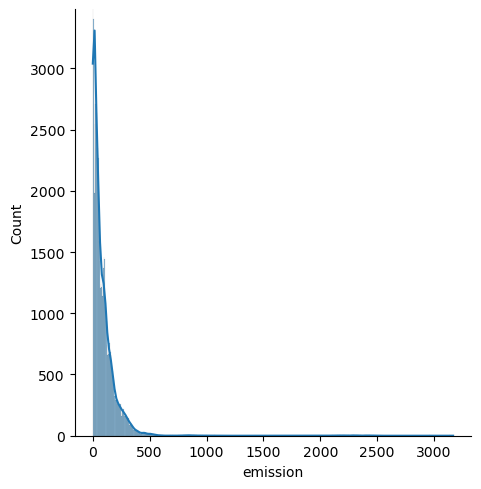

In [185]:
sns.displot(df, x='emission', kde=True)
plt.ylim(0, df['emission'].max()*1.1)

Seems like the emission follows an exponential distribution, with most values within the [0,500] interval. 

# Multivariate Analysis

## Correlations and Covariances
We explore the following relations:
- Correlation between features and target
- Correlation among features

/tmp/ipykernel_32/1216647311.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_corrs = df.corr().loc[:,'emission'].sort_values(ascending=False) \


<Axes: >

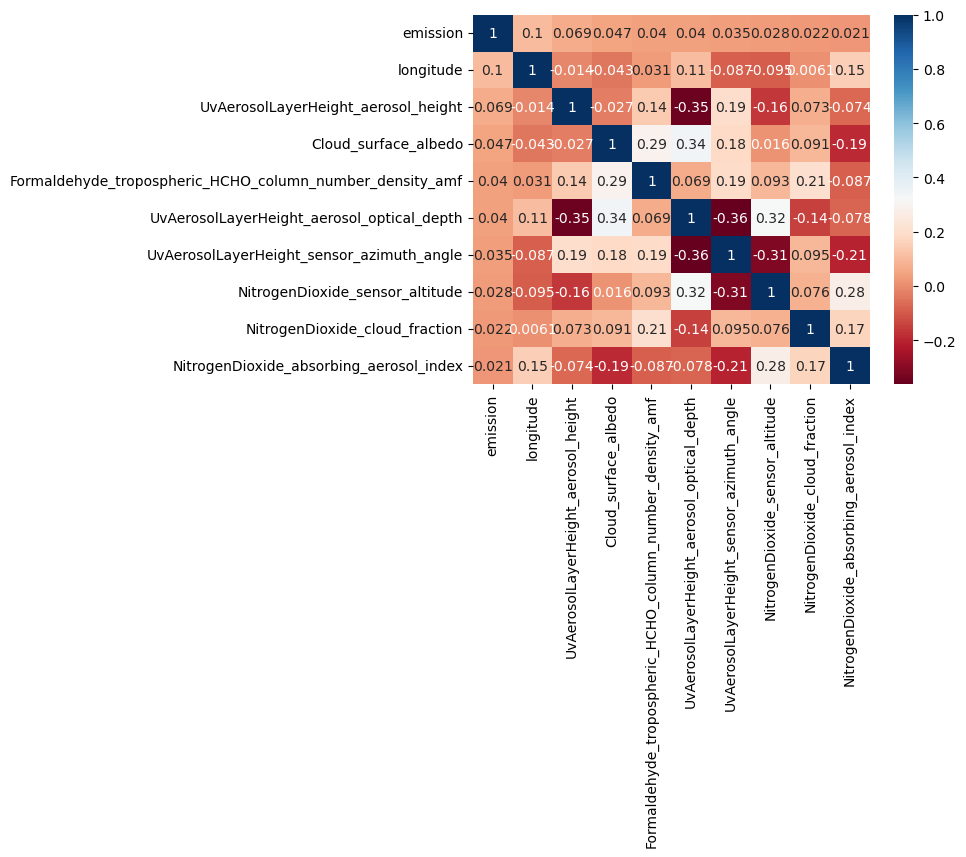

In [186]:
# Idea of plotting k features having highest correlation with data taken from:
# https://www.kaggle.com/code/inversion/getting-started-eda#8.-Correlations---EDA
feature_corr_todisplay = 10
top_corrs = df.corr().loc[:,'emission'].sort_values(ascending=False) \
                                        .iloc[:feature_corr_todisplay].index
top_corrs = list(top_corrs)
sns.heatmap(df.loc[:,top_corrs].corr(), annot=True, cmap='RdBu')

The heatmap suggests that:
- Longitude is highly correlated with emission
- Multiple UV features (which are almost always NULL) are highly correlated with emission. 

We can plot the heatmap again, but this time excluding all features that are more than 50% Nan values. 

/tmp/ipykernel_32/371666658.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_corrs = temp.corr().loc[:,'emission'].sort_values(ascending=False) \


<Axes: >

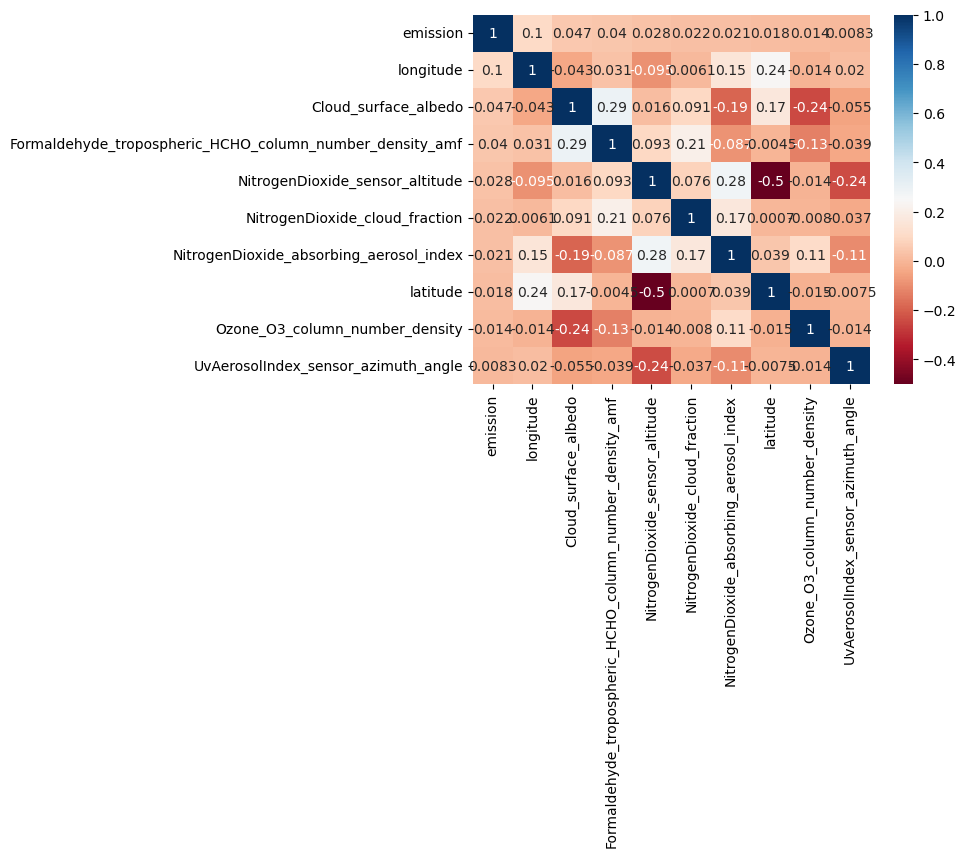

In [187]:
temp = df.loc[:, (100*df.isna().sum()/df.shape[0]) < 50]
top_corrs = temp.corr().loc[:,'emission'].sort_values(ascending=False) \
                                        .iloc[:feature_corr_todisplay].index
top_corrs = list(top_corrs)
sns.heatmap(df.loc[:,top_corrs].corr(), annot=True, cmap='RdBu')

Notice now that both the location features, latitude and longitude, are among the top 10 features correlated with our target. Thus in the next section, we explore how latitude and longitude data affect emissions. 
Recall that we always have location and time information. We check how much information we can get from the location first. 
1. Obtain the mean and variances of CO2 emission for each location. 
2. Plot the data to identify any trends

/tmp/ipykernel_32/352179625.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean().loc[:,'emission'].sort_values() \


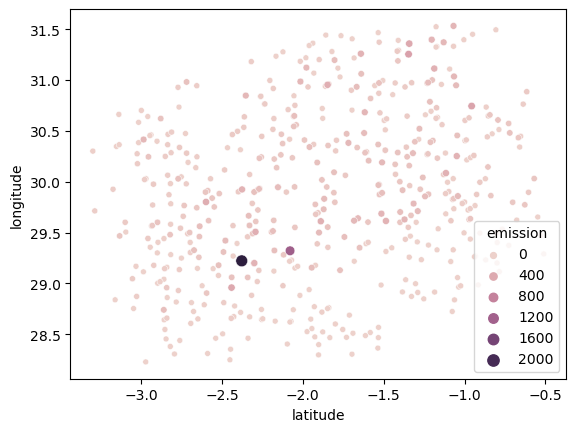

In [188]:
location_mean_emissions =df.groupby(['latitude', 'longitude']) \
                            .mean().loc[:,'emission'].sort_values() \
                            .reset_index()
sns.scatterplot(location_mean_emissions, 
                x='latitude', y='longitude', 
                hue='emission', 
                size='emission');

This is not very informative, but it does seem like there are two locations with significantly higher average CO2 emissions.

We can now check if any location has significant variance in the emissions. 

/tmp/ipykernel_32/2776433920.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  var_location_emission = df.groupby(['latitude', 'longitude']).var().loc[:,'emission']


<Axes: xlabel='latitude', ylabel='longitude'>

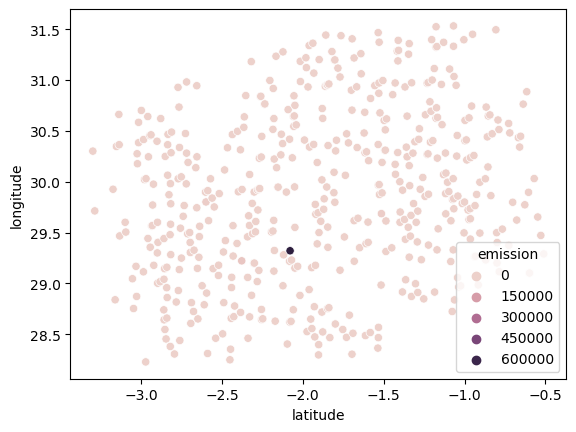

In [189]:
var_location_emission = df.groupby(['latitude', 'longitude']).var().loc[:,'emission']
var_location_emission = var_location_emission.reset_index()
sns.scatterplot(var_location_emission, x='latitude', y='longitude', hue='emission')

Again, this is not very useful, but does tell us that there is a location whose emission time series has significantly higher variance 

### Time Series
Let us now do a seasonal (yearly) plot of CO2 emissions for each location.

In [190]:
# Zip values to perform ordinal encoding on (latitude,longitude) pair
encoded_location, _ = pd.factorize(
    pd._libs.lib.fast_zip(
        [df['latitude'].values, df['longitude'].values]
    )
)
encoded_location = pd.Series(encoded_location)
df['encoded_location'] = encoded_location

In [ ]:
years = df['year'].unique()
palette = sns.color_palette("tab10")
for i in range(years.size):
    plt.figure()
    ax = sns.lineplot(data = df.loc[df['year']==years[i], :],
                      x='week_no',y='emission',
                      hue='encoded_location', palette = palette,
                      legend=False);
    ax.set_title("Emissions in " + str(years[i]));

/tmp/ipykernel_32/1335040305.py:5: UserWarning: 
The palette list has fewer values (10) than needed (497) and will cycle, which may produce an uninterpretable plot.
  ax = sns.lineplot(data = df.loc[df['year']==years[i], :],
/tmp/ipykernel_32/1335040305.py:5: UserWarning: 
The palette list has fewer values (10) than needed (497) and will cycle, which may produce an uninterpretable plot.
  ax = sns.lineplot(data = df.loc[df['year']==years[i], :],


In [ ]:
# Original code to concatenate time series found in below link
# https://www.kaggle.com/code/ambrosm/pss3e20-eda-which-makes-sense#Dimensionality-reduction

for index,location in df.loc[:,['latitude', 'longitude']]\
                        .drop_duplicates().iterrows():
    current_timeseries = df.loc[(df['latitude'] == location[0]) & 
                                (df['longitude'] == location[1]), 
                                'emission']
    weeks = range(current_timeseries.size)
    sns.lineplot(x=weeks, y=current_timeseries)

ax = plt.gca()
ax.set_title('CO2 Emissions by location')
ax.set_xlabel('Weeks')
ax.set_ylabel('CO2 Emission')

ax.axvline(x=0, color = 'k', linestyle = '--')
ax.axvline(x=53, color = 'k', linestyle = '--')
ax.axvline(x=106, color = 'k', linestyle = '--')
ax.axvline(x=159, color = 'k', linestyle = '--')

# Trend
In this section we check whether the time series have any trend componenet. We first plot the moving averages of each location with window lengths of month(4 weeks), quarter (12 weeks) and year(53 weeks).

In [ ]:
windows = [4,26,53]
window_names = ['Month', 'Quarter', 'Year']

for i in range(len(windows)):
    plt.figure()
    for index,location in df.loc[:,['latitude', 'longitude']]\
                        .drop_duplicates().iterrows():
        current_timeseries = df.loc[(df['latitude'] == location[0]) & 
                                    (df['longitude'] == location[1]), 
                                    'emission']    
        moving_avg_trend = current_timeseries.rolling(window=windows[i], 
                                                      center=False, 
                                                      closed='both').mean()
        weeks = range(current_timeseries.size)
        sns.lineplot(x=weeks, y=moving_avg_trend)
    
    ax = plt.gca()
    title_text = window_names[i] + "ly" + " moving average plot"
    ax.set_title(title_text)
    ax.axvline(x=0, color = 'k', linestyle = '--')
    ax.axvline(x=53, color = 'k', linestyle = '--')
    ax.axvline(x=106, color = 'k', linestyle = '--')
    ax.axvline(x=159, color = 'k', linestyle = '--')

The key takeaways from the plots are:
- The monthly moving average plot looks similar to the weekly timeseries plot, which suggests that there may be montly seasonality.
- The plots show a dip in the quarterly moving average CO2 emissions mid 2022. 

We now check the average quarterly yoy (year on year) emission change for each location. 

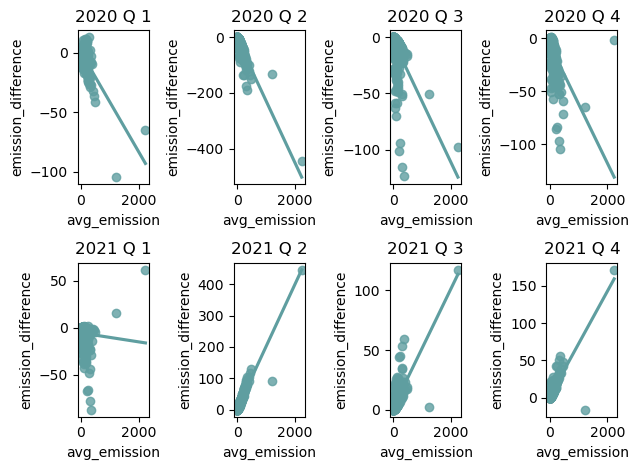

In [30]:
temp = df.loc[:,['latitude', 'longitude', 'year', 'week_no', 'emission']].copy()
temp['quarter'] = temp['week_no'] // 14 + 1
temp = temp.drop(columns='week_no')

avg_emission = temp.groupby(by=['latitude','longitude'])['emission'] \
                    .mean().reset_index()
temp = temp.merge(avg_emission, on=['latitude','longitude'])
temp = temp.rename(columns={'emission_x':'emission', 'emission_y':'avg_emission'})

group = temp.groupby(by=['latitude', 'longitude', 'year', 'quarter']).mean()
shift_quarter = 4;
group['emission_difference'] = group['emission'] - group.shift(4)['emission']
group = group.drop(index=2019, level=2)
group = group.reset_index(level=['latitude', 'longitude']).sort_index()

fig, axs = plt.subplots(2,4)
for i in group.index.unique():
    row = 0 if i[0]==2020 else 1
    currax = axs[row, i[1]-1]
    sns.regplot(data=group.loc[i], x='avg_emission', y='emission_difference', 
                color='cadetblue',
                ci=None,
                ax=currax)
    currax.set_title(str(i[0]) + ' Q ' + str(i[1]))
plt.tight_layout()    

The above plot shows that the average quarterly yoy emission went down in 2020 and went back up in 2021. In general, locations with larger average emissions saw bigger yoy changes in 2020 (negative) and 2021 (positive). 

We could fit a linear/polynomial regression to predict the change in yoy avg quarterly emission, and use to forecast emissions. However, this approach has some caveats:
- This approach would involve forecasting the yearly average, and utilizing the result to forecast each quarter. This can cause error propogation. 
- This model would not utilize any of the other features

Thus, it may be better to not extrapolate this trend, and instead explore seasonality, serial dependence of the target.

Note that there is a more involved analysis of the above discouraging use of trend that can be found at:
https://www.kaggle.com/code/ambrosm/pss3e20-eda-which-makes-sense#Extrapolating-the-trend

## PCA
We are currently working with a timeseries for 497 locations. Studying the seasonality(periodograms) and serial dependence(partial autocorrelations) for each location is infeasible. Moreover, adding potentially multiple seasonal and lag features for each location is computationally complex and memory intensive. 